# heatmap

## all

In [1]:
import os
import pandas as pd

data = {
    'model_name': ['DecompDiff','FLAG','MolCraft','Pocket2Mol','PocketFlow','SurfGen','TamGen','TargetDiff','diffSBDD(CrossDock)','diffSBDD(MOAD)'],
    'Validity': [0.589, 0.136, 0.964, 0.878, 1.0, 0.37, 0.996, 0.678, 0.781, 0.715],
    'QED': [0.518, 0.593, 0.498, 0.436, 0.481, 0.38, 0.573, 0.324, 0.498, 0.464],
    'SA': [0.579, 0.642, 0.645, 0.659, 0.784, 0.614, 0.764, 0.537, 0.604, 0.612],
    'logp': [1.983, 1.652, 2.938, 4.053, 4.513, 3.301, 2.226, 3.636, 2.213, 2.21],
    'lipinski': [4.397, 4.977, 4.349, 4.121, 4.444, 4.07, 4.849, 3.796, 4.58, 4.58],
    'Uniqueness': [0.927, 0.999, 0.998, 1.0, 0.919, 1.0, 0.272, 1.0, 0.999, 0.997],
    'Diversity': [0.835, 0.9, 0.879, 0.833, 0.876, 0.813, 0.844, 0.887, 0.899, 0.898],
    
    # 1- JS value as score
    'Functional Group': [0.607, 0.524, 0.625, 0.609, 0.576, 0.51, 0.607, 0.567, 0.625, 0.606],
    'Atom Type': [0.905, 0.878, 0.903, 0.885, 0.836, 0.87, 0.878, 0.895, 0.907, 0.899],
    'Ring Type': [0.724,0.861,0.858,0.844,0.774,0.828,0.881,0.782,0.735,0.729]
}

df = pd.DataFrame(data)
result = df.set_index('model_name').to_dict(orient='index')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

cm = 1/2.54
fontsize = 10

def plot_heatmap(data, metrics, use_annot=True, sort_by='Validity', save_path=None):
    """
    Plots a heatmap where rows are models and columns are metrics,
    sorted by a specific metric (e.g., internal_energy).
    """

    factor_labels = {
        'Validity': 'Validity',
        'QED': 'QED',
        'SA': 'SA',
        'Uniqueness': 'Uniqueness',
        'Diversity': 'Diversity',
        
        'Atom Type': 'Atom Type',
        'Ring Type': 'Ring Type',
        'Functional Group': 'Functional Group',
    }
    
    df_denovo = pd.DataFrame(index=[factor_labels[m] for m in metrics])
    for model_name, model_data in data['De novo'].items():
        df_denovo[model_name] = [model_data.get(m, np.nan) for m in metrics]

    df_denovo = df_denovo.loc[:, df_denovo.loc[sort_by].sort_values(ascending=False).index]

    df_hit2lead = pd.DataFrame(index=[factor_labels[m] for m in metrics])
    for model_name, model_data in data['Hit to Lead'].items():
        df_hit2lead[model_name] = [model_data.get(m, np.nan) for m in metrics]
    
    df_hit2lead = df_hit2lead.loc[:, df_hit2lead.loc[sort_by].sort_values(ascending=False).index]
    
    df_final = pd.concat([df_denovo, df_hit2lead], axis=1)

    
    plt.figure(figsize=(9,4.5), dpi=300)
    sns.set(font_scale=1.0)

    colors = [
        (0.0, '#a50026'),   
        (0.25, '#f46d43'),  
        (0.5,  '#f7f7f7'),  
        (0.75, '#74add1'),  
        (1.0,  '#313695')   
    ]


    cmap = LinearSegmentedColormap.from_list("symmetric_coolwarm", colors)
    
    ax = sns.heatmap(
        df_final,
        annot=use_annot,
        fmt=".3f",
        # cmap="Greens",
        cmap=cmap,
        vmin=0,
        vmax=1.0,
        linewidths=0.5,
        linecolor="gray",
        annot_kws={"fontsize":fontsize-4}   #7
    )

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=fontsize-3)

    cbar.set_label("Score",fontdict={'size': fontsize-2})  #8
    ax.tick_params(
        axis='both',        
        which='both',       
        direction='inout', 
        length=4,           
        width=0.8,          
        colors='black',     
        bottom=False, top=True, left=True, right=False  
    )

    ax.xaxis.tick_top()                  
    ax.xaxis.set_label_position('top')   
    plt.xticks(rotation=45, ha='left',rotation_mode='anchor',fontsize=fontsize-4)  #7.5
    plt.yticks(fontsize=fontsize-4)  #8
    
    y_line = 1.22    
    y_text = 1.25    
    
    group_map = {
        'De novo': list(data['De novo'].keys()),
        'Hit to Lead': list(data['Hit to Lead'].keys())
    }
    for label, model_names in group_map.items():
        idxs = [list(df_final.columns).index(name) for name in model_names]
        print(idxs)
        
        if label == 'De novo':
            x_start = 0.5
            x_end = 9.5
        elif label == 'Hit to Lead':
            x_start = 10.5
            x_end = 16.5
        
        x_center = (x_start + x_end) / 2

        ax.plot([x_start-0.2, x_end+0.2], [y_line, y_line],
                color='black', lw=0.6, clip_on=False, transform=ax.get_xaxis_transform())

        ax.text(x_center, y_text, label,
                ha='center', va='bottom', fontsize=8,
                clip_on=False, transform=ax.get_xaxis_transform())
    
    
    
    # plt.title("Model Performance Across Metrics", fontsize=14)
    plt.tight_layout()
    # save svg
    plt.savefig(save_path,format="svg",bbox_inches='tight')
    # print(f"Heatmap saved to {save_file}")
    plt.show()
    


[7, 9, 2, 3, 0, 8, 1, 6, 4, 5]
[14, 15, 11, 10, 4, 5, 16]


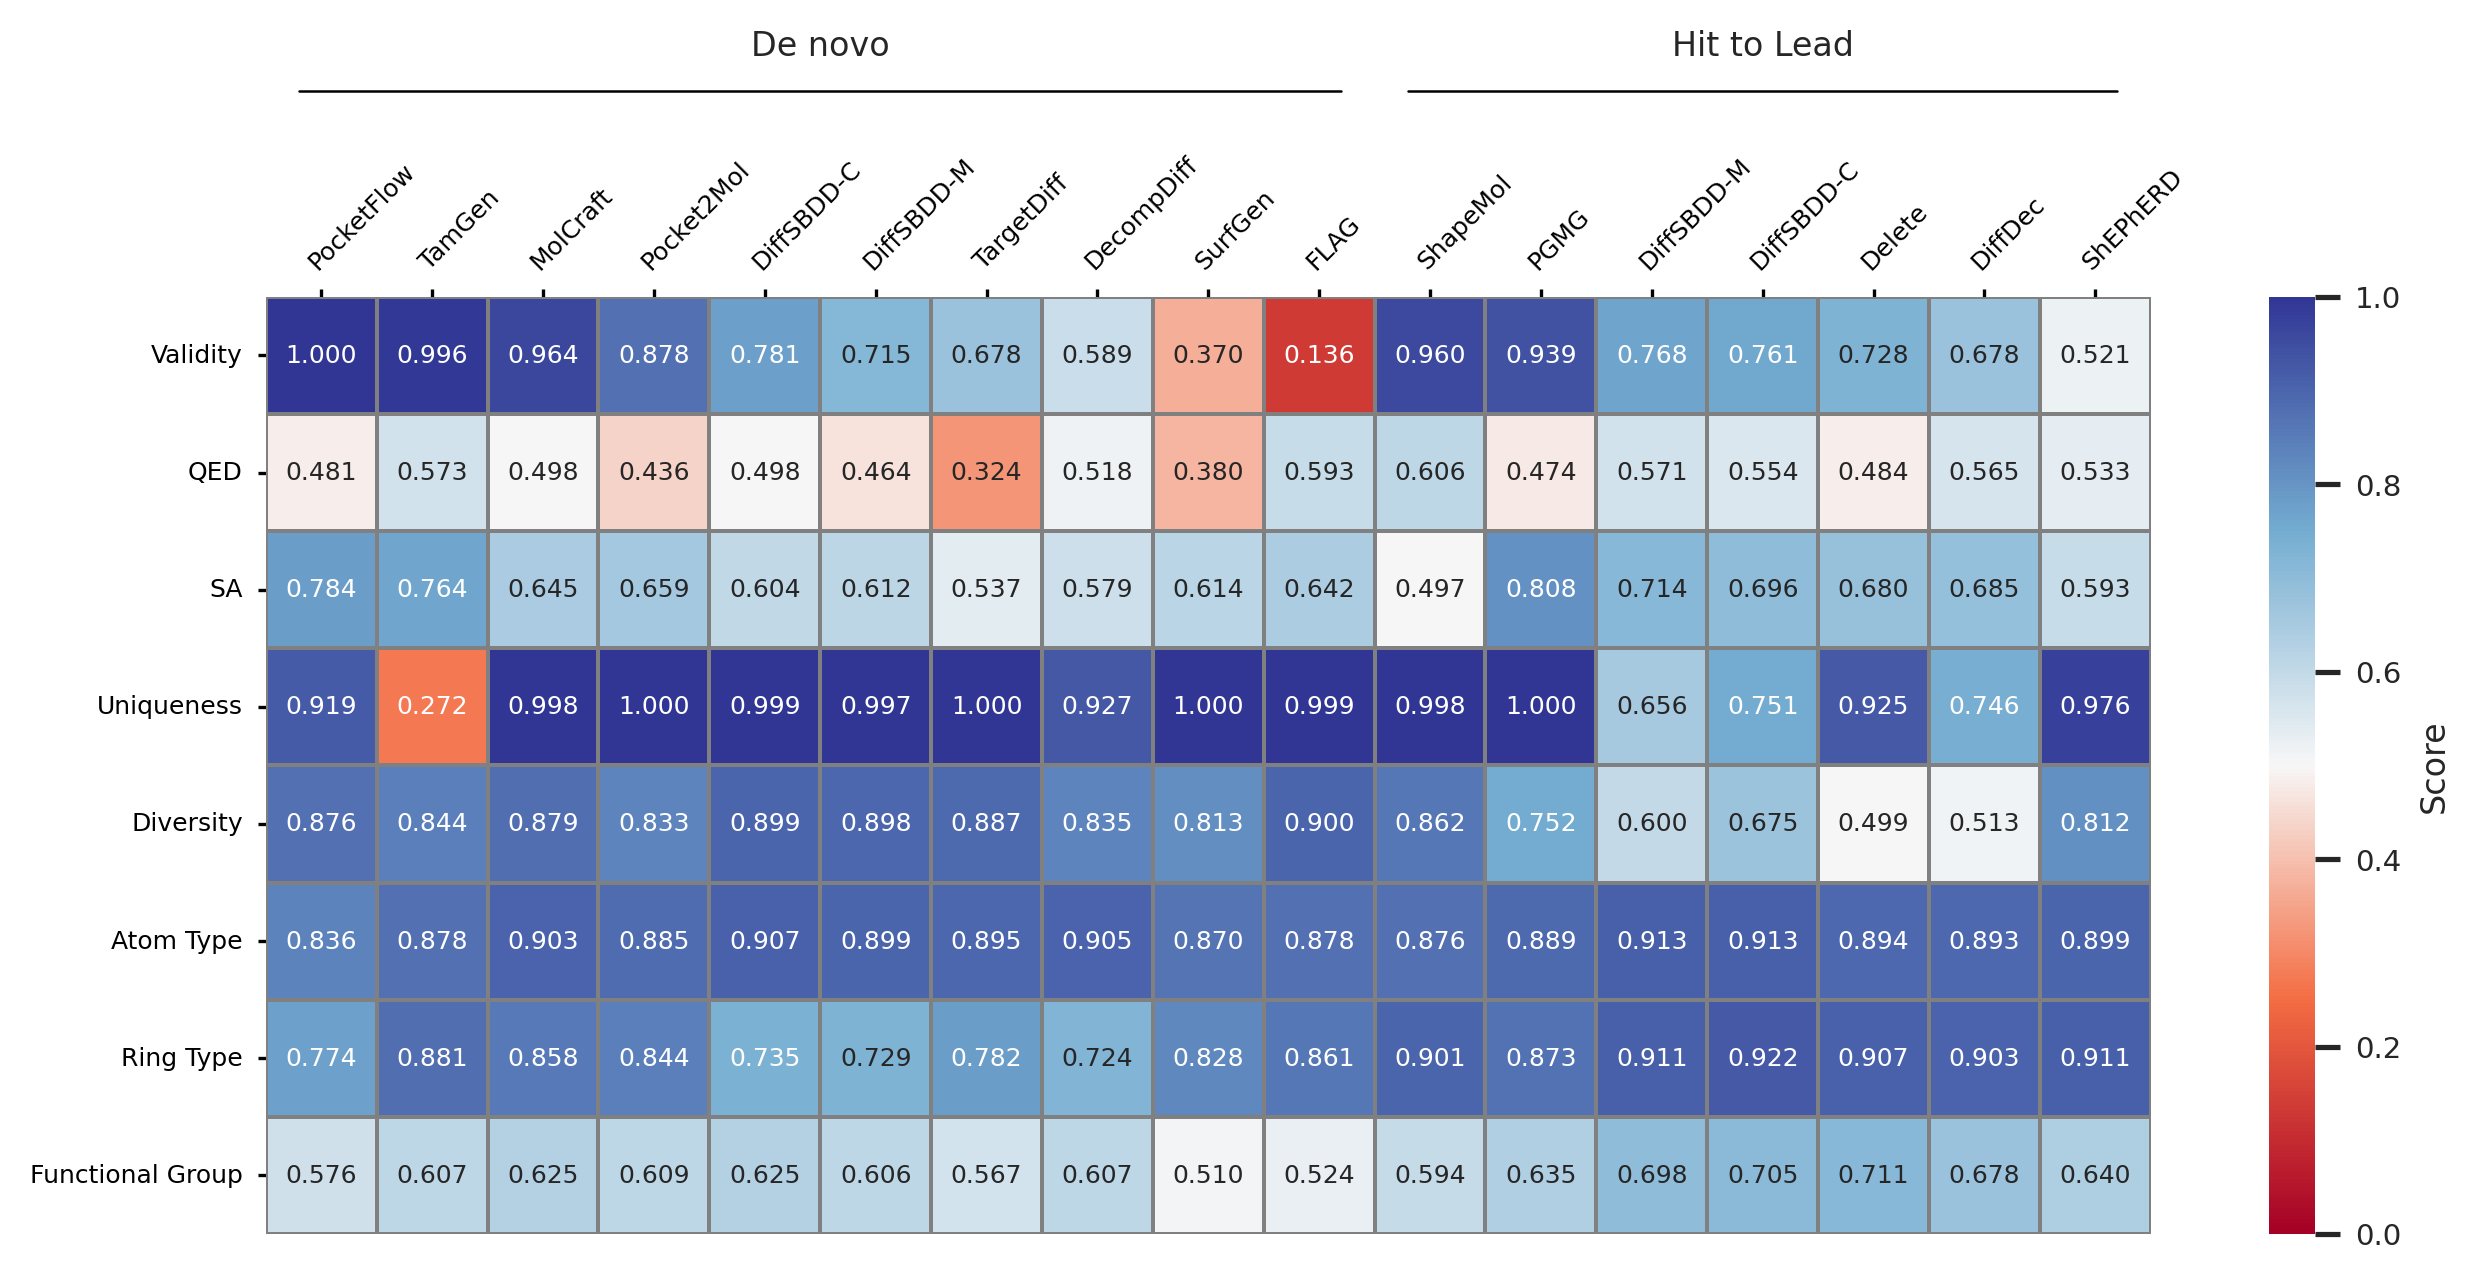

[7, 9, 2, 3, 0, 8, 1, 6, 4, 5]
[14, 15, 11, 10, 4, 5, 16]


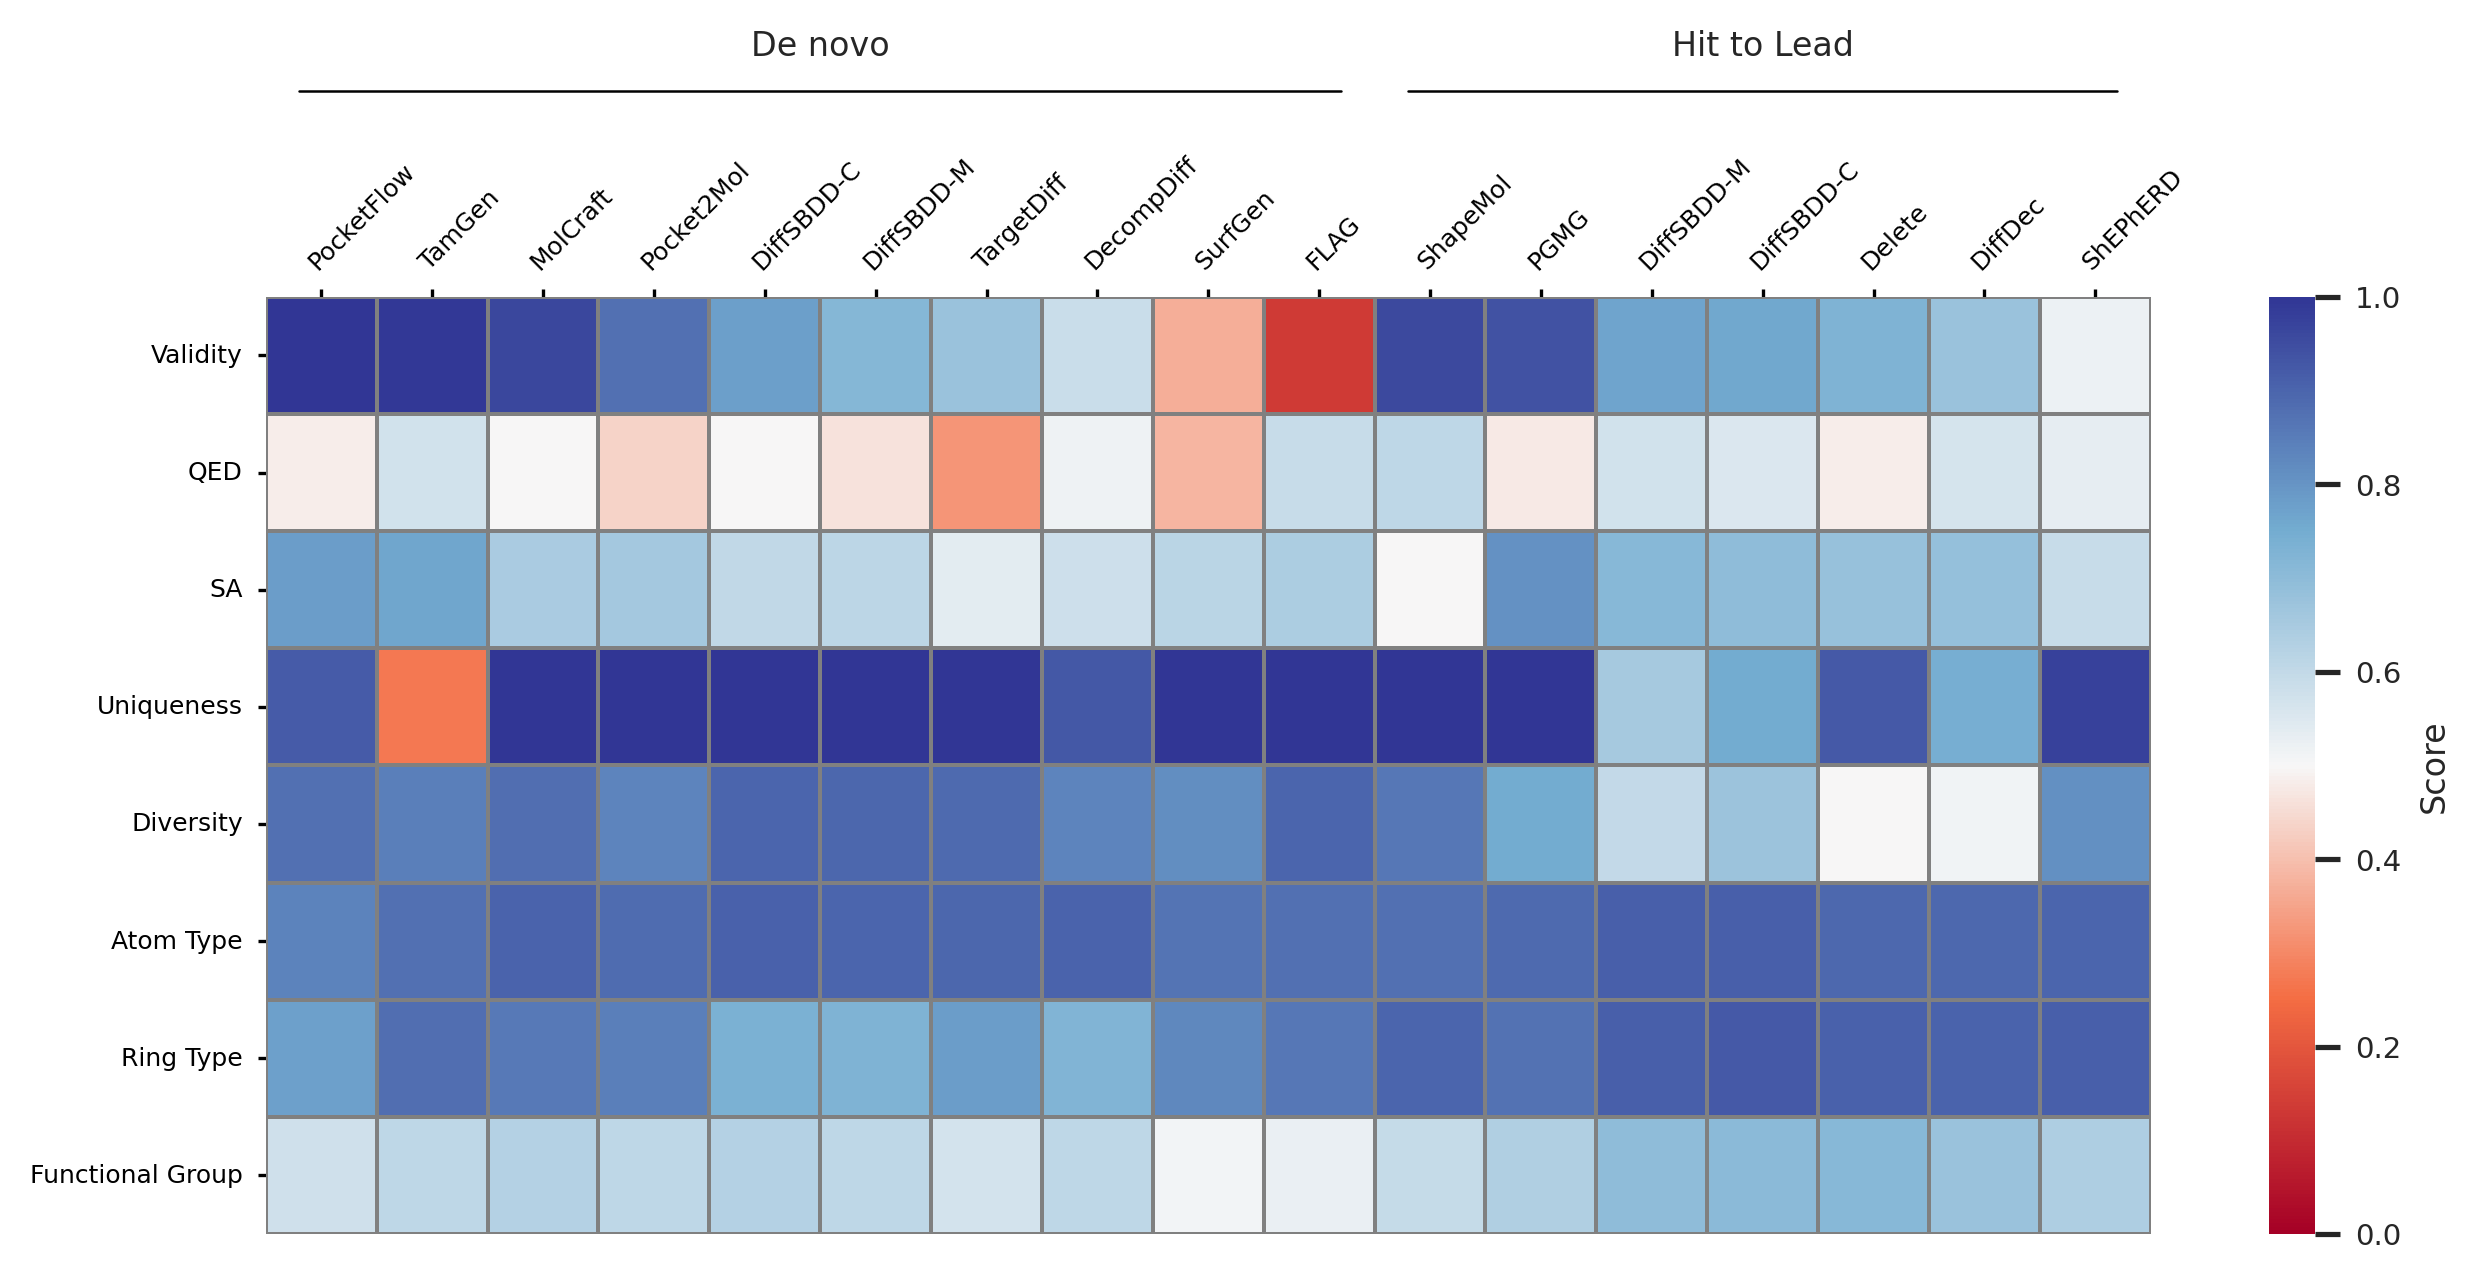

In [ ]:
result = {'De novo':{'DecompDiff': {'Validity': 0.589,
  'QED': 0.518,
  'SA': 0.579,
  'logp': 1.983,
  'lipinski': 4.397,
  'Uniqueness': 0.927,
  'Diversity': 0.835,
  'Functional Group': 0.607,
  'Atom Type': 0.905,
  'Ring Type': 0.724},
 'FLAG': {'Validity': 0.136,
  'QED': 0.593,
  'SA': 0.642,
  'logp': 1.652,
  'lipinski': 4.977,
  'Uniqueness': 0.999,
  'Diversity': 0.9,
  'Functional Group': 0.524,
  'Atom Type': 0.878,
  'Ring Type': 0.861},
 'MolCraft': {'Validity': 0.964,
  'QED': 0.498,
  'SA': 0.645,
  'logp': 2.938,
  'lipinski': 4.349,
  'Uniqueness': 0.998,
  'Diversity': 0.879,
  'Functional Group': 0.625,
  'Atom Type': 0.903,
  'Ring Type': 0.858},
 'Pocket2Mol': {'Validity': 0.878,
  'QED': 0.436,
  'SA': 0.659,
  'logp': 4.053,
  'lipinski': 4.121,
  'Uniqueness': 1.0,
  'Diversity': 0.833,
  'Functional Group': 0.609,
  'Atom Type': 0.885,
  'Ring Type': 0.844},
 'PocketFlow': {'Validity': 1.0,
  'QED': 0.481,
  'SA': 0.784,
  'logp': 4.513,
  'lipinski': 4.444,
  'Uniqueness': 0.919,
  'Diversity': 0.876,
  'Functional Group': 0.576,
  'Atom Type': 0.836,
  'Ring Type': 0.774},
 'SurfGen': {'Validity': 0.37,
  'QED': 0.38,
  'SA': 0.614,
  'logp': 3.301,
  'lipinski': 4.07,
  'Uniqueness': 1.0,
  'Diversity': 0.813,
  'Functional Group': 0.51,
  'Atom Type': 0.87,
  'Ring Type': 0.828},
 'TamGen': {'Validity': 0.996,
  'QED': 0.573,
  'SA': 0.764,
  'logp': 2.226,
  'lipinski': 4.849,
  'Uniqueness': 0.272,
  'Diversity': 0.844,
  'Functional Group': 0.607,
  'Atom Type': 0.878,
  'Ring Type': 0.881},
 'TargetDiff': {'Validity': 0.678,
  'QED': 0.324,
  'SA': 0.537,
  'logp': 3.636,
  'lipinski': 3.796,
  'Uniqueness': 1.0,
  'Diversity': 0.887,
  'Functional Group': 0.567,
  'Atom Type': 0.895,
  'Ring Type': 0.782},
 'DiffSBDD-C': {'Validity': 0.781,
  'QED': 0.498,
  'SA': 0.604,
  'logp': 2.213,
  'lipinski': 4.58,
  'Uniqueness': 0.999,
  'Diversity': 0.899,
  'Functional Group': 0.625,
  'Atom Type': 0.907,
  'Ring Type': 0.735},
 'DiffSBDD-M': {'Validity': 0.715,
  'QED': 0.464,
  'SA': 0.612,
  'logp': 2.21,
  'lipinski': 4.58,
  'Uniqueness': 0.997,
  'Diversity': 0.898,
  'Functional Group': 0.606,
  'Atom Type': 0.899,
  'Ring Type': 0.729}
 },
 
 'Hit to Lead':{'Delete': {'Functional Group': 0.7110000000000001,
  'Atom Type': 0.894,
  'Ring Type': 0.907,
  'Validity': 0.728,
  'QED': 0.484,
  'SA': 0.68,
  'logp': 3.035,
  'lipinski': 4.155,
  'Uniqueness': 0.925,
  'Diversity': 0.499},
 'DiffDec': {'Functional Group': 0.6779999999999999,
  'Atom Type': 0.893,
  'Ring Type': 0.903,
  'Validity': 0.678,
  'QED': 0.565,
  'SA': 0.685,
  'logp': 3.004,
  'lipinski': 4.369,
  'Uniqueness': 0.746,
  'Diversity': 0.513},
 'PGMG': {'Functional Group': 0.635,
  'Atom Type': 0.889,
  'Ring Type': 0.873,
  'Validity': 0.939,
  'QED': 0.474,
  'SA': 0.808,
  'logp': 4.358,
  'lipinski': 4.394,
  'Uniqueness': 1.0,
  'Diversity': 0.752},
 'ShapeMol': {'Functional Group': 0.594,
  'Atom Type': 0.876,
  'Ring Type': 0.901,
  'Validity': 0.96,
  'QED': 0.606,
  'SA': 0.497,
  'logp': 1.768,
  'lipinski': 4.552,
  'Uniqueness': 0.998,
  'Diversity': 0.862},
 'DiffSBDD-C': {'Functional Group': 0.7050000000000001,
  'Atom Type': 0.913,
  'Ring Type': 0.922,
  'Validity': 0.761,
  'QED': 0.554,
  'SA': 0.696,
  'logp': 2.438,
  'lipinski': 4.633,
  'Uniqueness': 0.751,
  'Diversity': 0.675},
 'DiffSBDD-M': {'Functional Group': 0.698,
  'Atom Type': 0.913,
  'Ring Type': 0.911,
  'Validity': 0.768,
  'QED': 0.571,
  'SA': 0.714,
  'logp': 2.496,
  'lipinski': 4.704,
  'Uniqueness': 0.656,
  'Diversity': 0.6},
 'ShEPhERD': {'Functional Group': 0.64,
  'Atom Type': 0.899,
  'Ring Type': 0.911,
  'Validity': 0.521,
  'QED': 0.533,
  'SA': 0.593,
  'logp': 3.004,
  'lipinski': 4.616,
  'Uniqueness': 0.976,
  'Diversity': 0.812},
 }
}




top_8_keys = [
    'Validity',
    'QED',
    'SA',
    
    'Uniqueness',
    'Diversity',
    
    'Atom Type',    
    'Ring Type',
    'Functional Group',
]


plot_heatmap(result, top_8_keys, save_path="./final_plot/output/00-2D_General_Properties_heatmap_all.svg")
plot_heatmap(result, top_8_keys, use_annot=False, save_path="./final_plot/output/00-2D_General_Properties_heatmap_all_NoNumber.svg")

## seen

In [ ]:
import os
import pandas as pd

general_property_denovo_seen_csv = "./final_plot/general_property/denovo_design/all_proteins_repeats_seen.csv"
general_property_hit2lead_seen_csv = "./final_plot/general_property/hit2lead/all_proteins_repeats_seen.csv"

property_2d_denovo_seen_csv = "./final_plot/2d_property/denovo_design/2d_properties_denovo_Seen_mean_std.csv"
property_2d_hit2lead_seen_csv = "./final_plot/2d_property/hit2lead/repeats_seen_proteins.csv"

df_general_property_denovo = pd.read_csv(general_property_denovo_seen_csv)
df_general_property_hit2lead = pd.read_csv(general_property_hit2lead_seen_csv)

df_property_2d_denovo = pd.read_csv(property_2d_denovo_seen_csv).rename(columns={'Unnamed: 0': 'model_name'})
df_property_2d_hit2lead = pd.read_csv(property_2d_hit2lead_seen_csv)



In [ ]:

property_keys = ["model_name","validity","qed","sa","logp","lipinski","uniqueness","diversity", ]

df_general_property_denovo = df_general_property_denovo[property_keys].drop(0, axis=0)
df_general_property_hit2lead = df_general_property_hit2lead[property_keys].drop(0, axis=0)

for col in df_general_property_denovo.columns:
    if col != 'model_name':
        df_general_property_denovo[col] = pd.to_numeric(df_general_property_denovo[col], errors='coerce')
        
for col in df_general_property_hit2lead.columns:
    if col != 'model_name':
        df_general_property_hit2lead[col] = pd.to_numeric(df_general_property_hit2lead[col], errors='coerce')        

df_general_property_denovo

,model_name,validity,qed,sa,logp,lipinski,uniqueness,diversity
1,DecompDiff,0.599,0.530,0.605,2.002,4.535,0.955,0.863
2,FLAG,0.135,0.593,0.642,1.649,4.977,0.999,0.900
3,MolCraft,0.968,0.496,0.647,2.915,4.349,0.998,0.877
4,Pocket2Mol,0.889,0.436,0.666,4.053,4.124,1.000,0.831
5,PocketFlow,1.000,0.481,0.787,4.555,4.440,0.918,0.876
6,SurfGen,0.375,0.384,0.625,3.464,4.093,1.000,0.814
7,TamGen,0.997,0.569,0.760,2.258,4.845,0.274,0.847
8,TargetDiff,0.670,0.325,0.540,3.573,3.824,1.000,0.886
9,diffSBDD_cond_crossdocked,0.780,0.495,0.610,2.173,4.577,0.999,0.899
10,diffSBDD_cond_moad,0.719,0.460,0.617,2.106,4.572,0.996,0.898


In [ ]:
property_keys_2d = ["model_name","Functional Group JS","Atom Type JS","Ring Type JS"]
df_property_2d_denovo = df_property_2d_denovo[property_keys_2d].drop([0,1], axis=0)
df_property_2d_hit2lead = df_property_2d_hit2lead[property_keys_2d].drop([0], axis=0)

for col in df_property_2d_denovo.columns:
    if col != 'model_name':
        df_property_2d_denovo[col] = pd.to_numeric(df_property_2d_denovo[col], errors='coerce')
        df_property_2d_denovo[col] = 1 - df_property_2d_denovo[col]

for col in df_property_2d_hit2lead.columns:
    if col != 'model_name':
        df_property_2d_hit2lead[col] = pd.to_numeric(df_property_2d_hit2lead[col], errors='coerce')
        df_property_2d_hit2lead[col] = 1 - df_property_2d_hit2lead[col]

df_property_2d_denovo

,model_name,Functional Group JS,Atom Type JS,Ring Type JS
2,DecompDiff,0.605,0.905,0.723
3,FLAG,0.515,0.879,0.858
4,MolCraft,0.623,0.903,0.855
5,Pocket2Mol,0.612,0.885,0.840
6,PocketFlow,0.575,0.833,0.771
7,SurfGen,0.507,0.867,0.829
8,TamGen,0.617,0.885,0.879
9,TargetDiff,0.571,0.898,0.781
10,diffSBDD_cond_crossdocked,0.627,0.911,0.733
11,diffSBDD_cond_moad,0.606,0.901,0.726


In [ ]:
filter_keys = {
    "model_name": "model_name",
    
    "validity": "Validity",
    "qed": "QED",
    "sa": "SA",
    "logp": "logp",
    "lipinski": "lipinski",
    "uniqueness": "Uniqueness",
    "diversity": "Diversity",
    
    "Functional Group JS": "Functional Group",
    "Atom Type JS": "Atom Type",
    "Ring Type JS": "Ring Type",
}
df_final_denovo = pd.merge(df_general_property_denovo, df_property_2d_denovo, on='model_name', how='inner').set_index('model_name').rename(columns=filter_keys)
df_final_hit2lead = pd.merge(df_general_property_hit2lead, df_property_2d_hit2lead, on='model_name', how='inner').set_index('model_name').rename(columns=filter_keys)


,Validity,QED,SA,logp,lipinski,Uniqueness,Diversity,Functional Group,Atom Type,Ring Type
model_name,,,,,,,,,,
DeleteHit2Lead(CrossDock),0.723,0.479,0.677,2.898,4.129,0.920,0.489,0.708,0.893,0.910
DiffDec,0.681,0.555,0.681,2.942,4.342,0.756,0.512,0.681,0.894,0.909
PGMG,0.940,0.483,0.807,4.293,4.407,1.000,0.754,0.634,0.886,0.874
ShapeMol,0.967,0.603,0.493,1.748,4.532,0.998,0.861,0.588,0.872,0.900
diffSBDD_cond_crossdocked,0.768,0.550,0.697,2.363,4.613,0.726,0.656,0.704,0.914,0.923
diffSBDD_cond_moad,0.781,0.568,0.715,2.390,4.685,0.627,0.579,0.695,0.911,0.912
shepherd_x1x3x4_mosesaq_submission,0.526,0.532,0.592,2.874,4.603,0.970,0.806,0.640,0.895,0.910


In [50]:
df_final_denovo.to_dict(orient='index')

{'DecompDiff': {'Validity': 0.599,
  'QED': 0.53,
  'SA': 0.605,
  'logp': 2.002,
  'lipinski': 4.535,
  'Uniqueness': 0.955,
  'Diversity': 0.863,
  'Functional Group': 0.605,
  'Atom Type': 0.905,
  'Ring Type': 0.723},
 'FLAG': {'Validity': 0.135,
  'QED': 0.593,
  'SA': 0.642,
  'logp': 1.649,
  'lipinski': 4.977,
  'Uniqueness': 0.999,
  'Diversity': 0.9,
  'Functional Group': 0.515,
  'Atom Type': 0.879,
  'Ring Type': 0.858},
 'MolCraft': {'Validity': 0.968,
  'QED': 0.496,
  'SA': 0.647,
  'logp': 2.915,
  'lipinski': 4.349,
  'Uniqueness': 0.998,
  'Diversity': 0.877,
  'Functional Group': 0.623,
  'Atom Type': 0.903,
  'Ring Type': 0.855},
 'Pocket2Mol': {'Validity': 0.889,
  'QED': 0.436,
  'SA': 0.666,
  'logp': 4.053,
  'lipinski': 4.124,
  'Uniqueness': 1.0,
  'Diversity': 0.831,
  'Functional Group': 0.612,
  'Atom Type': 0.885,
  'Ring Type': 0.84},
 'PocketFlow': {'Validity': 1.0,
  'QED': 0.481,
  'SA': 0.787,
  'logp': 4.555,
  'lipinski': 4.44,
  'Uniqueness': 0.918

In [51]:
df_final_hit2lead.to_dict(orient='index')

{'DeleteHit2Lead(CrossDock)': {'Validity': 0.723,
  'QED': 0.479,
  'SA': 0.677,
  'logp': 2.898,
  'lipinski': 4.129,
  'Uniqueness': 0.92,
  'Diversity': 0.489,
  'Functional Group': 0.708,
  'Atom Type': 0.893,
  'Ring Type': 0.91},
 'DiffDec': {'Validity': 0.681,
  'QED': 0.555,
  'SA': 0.681,
  'logp': 2.942,
  'lipinski': 4.342,
  'Uniqueness': 0.756,
  'Diversity': 0.512,
  'Functional Group': 0.681,
  'Atom Type': 0.894,
  'Ring Type': 0.909},
 'PGMG': {'Validity': 0.94,
  'QED': 0.483,
  'SA': 0.807,
  'logp': 4.293,
  'lipinski': 4.407,
  'Uniqueness': 1.0,
  'Diversity': 0.754,
  'Functional Group': 0.634,
  'Atom Type': 0.886,
  'Ring Type': 0.874},
 'ShapeMol': {'Validity': 0.967,
  'QED': 0.603,
  'SA': 0.493,
  'logp': 1.748,
  'lipinski': 4.532,
  'Uniqueness': 0.998,
  'Diversity': 0.861,
  'Functional Group': 0.5880000000000001,
  'Atom Type': 0.872,
  'Ring Type': 0.9},
 'diffSBDD_cond_crossdocked': {'Validity': 0.768,
  'QED': 0.55,
  'SA': 0.697,
  'logp': 2.363,
 

[7, 9, 2, 3, 0, 8, 1, 6, 4, 5]
[14, 15, 11, 10, 4, 5, 16]


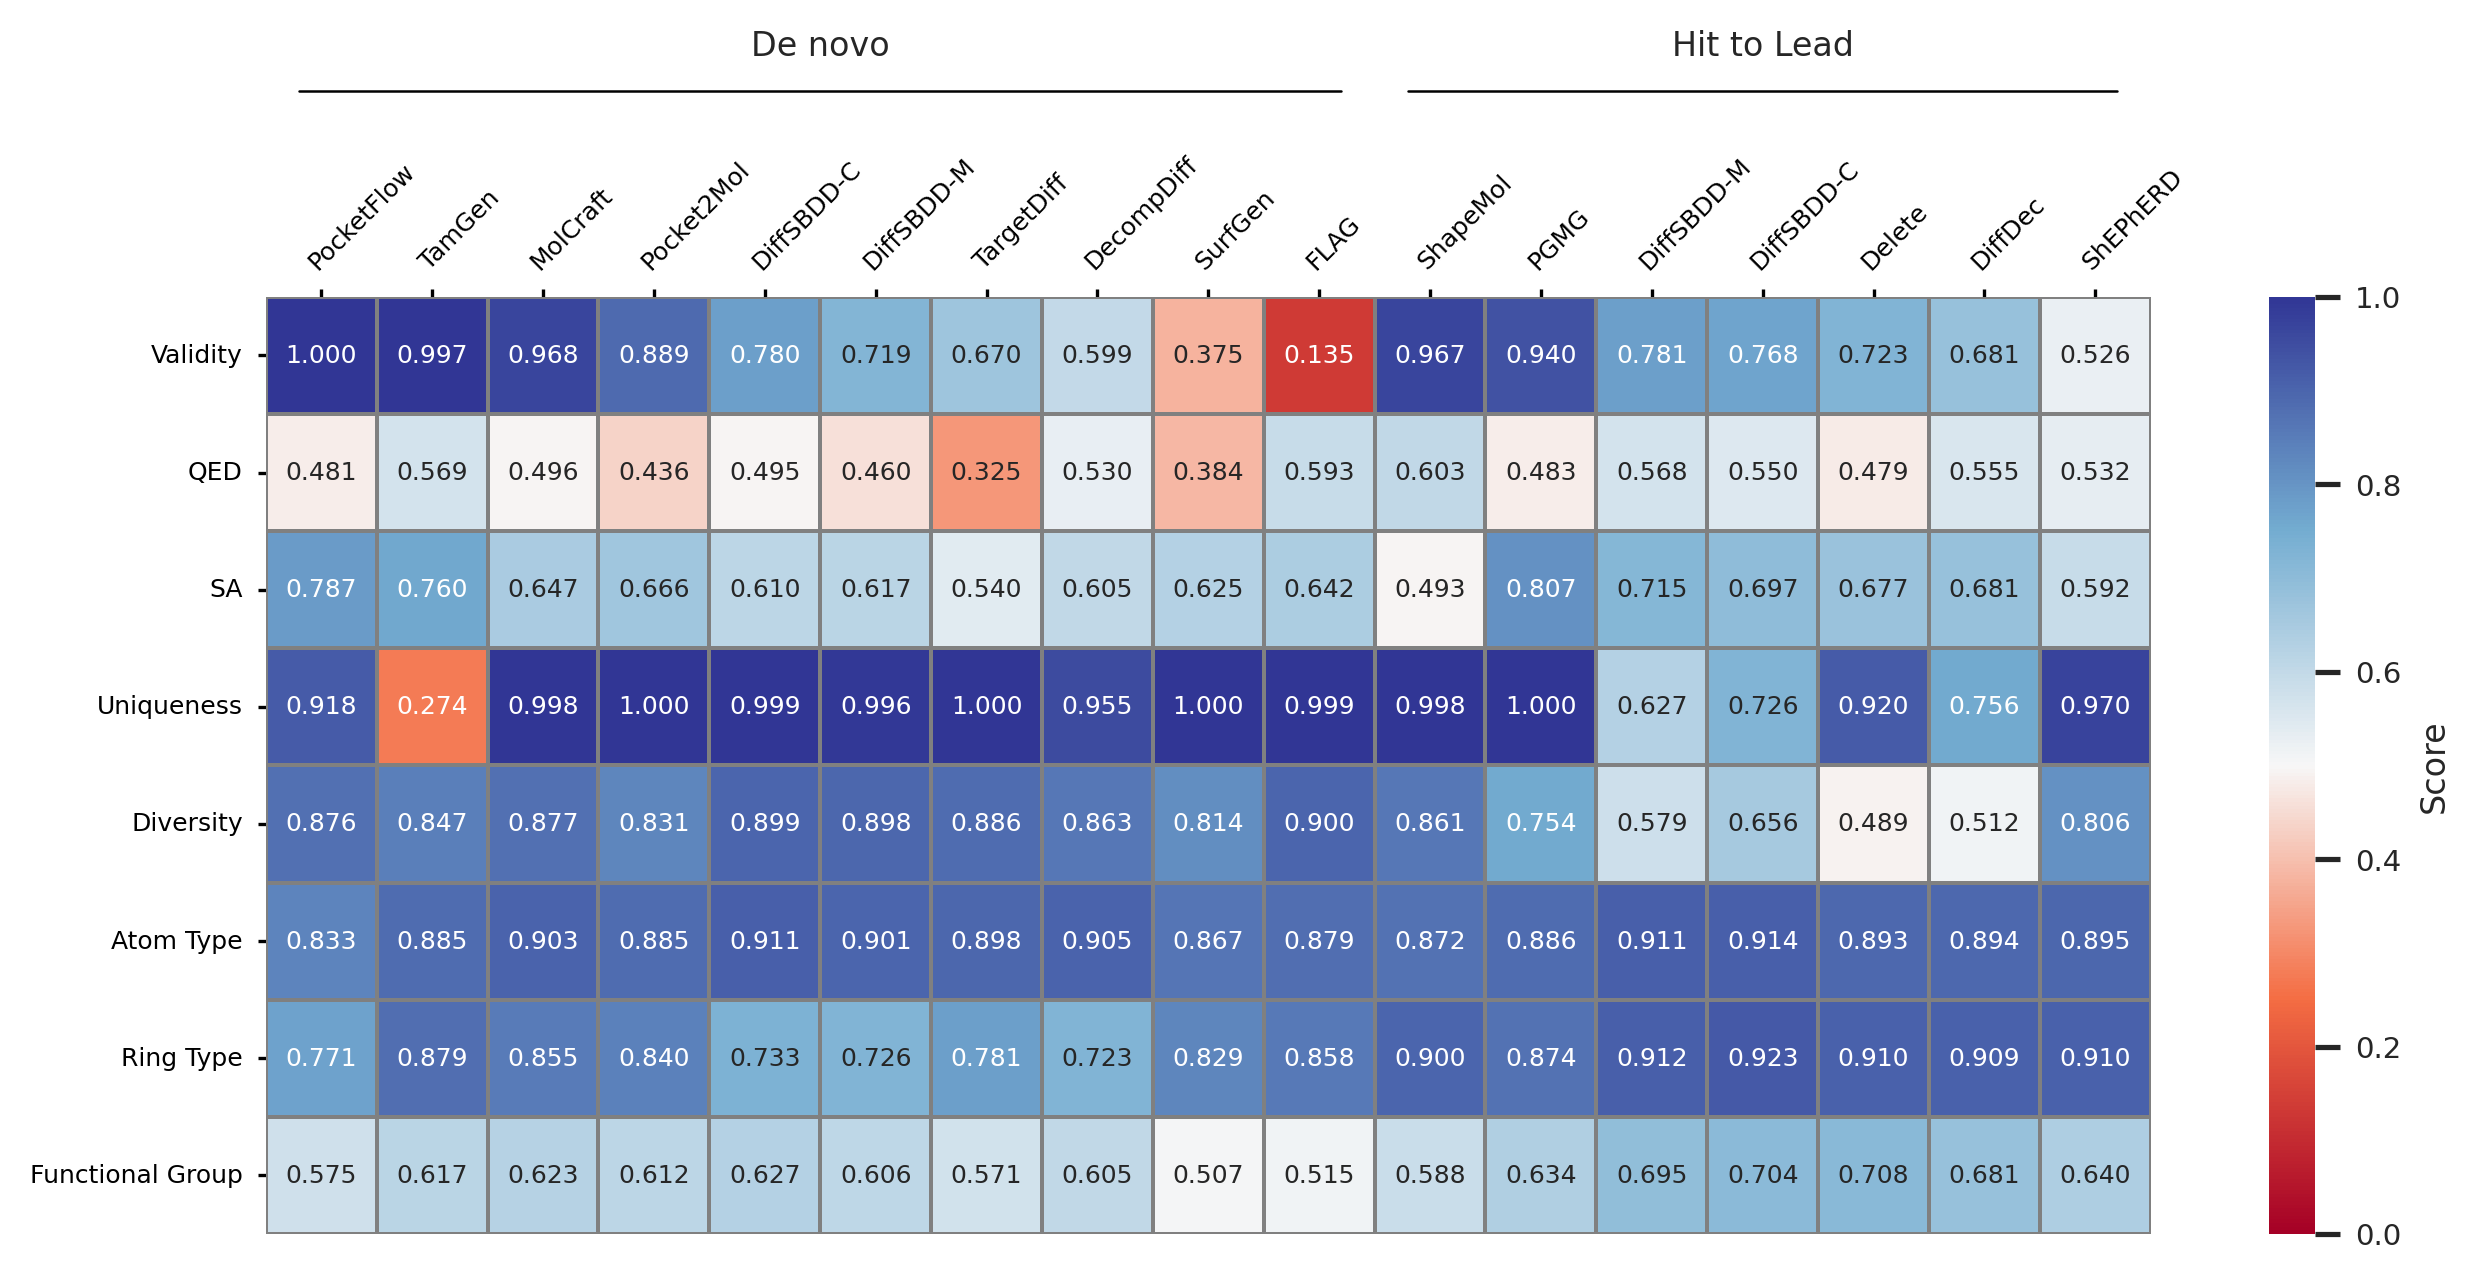

[7, 9, 2, 3, 0, 8, 1, 6, 4, 5]
[14, 15, 11, 10, 4, 5, 16]


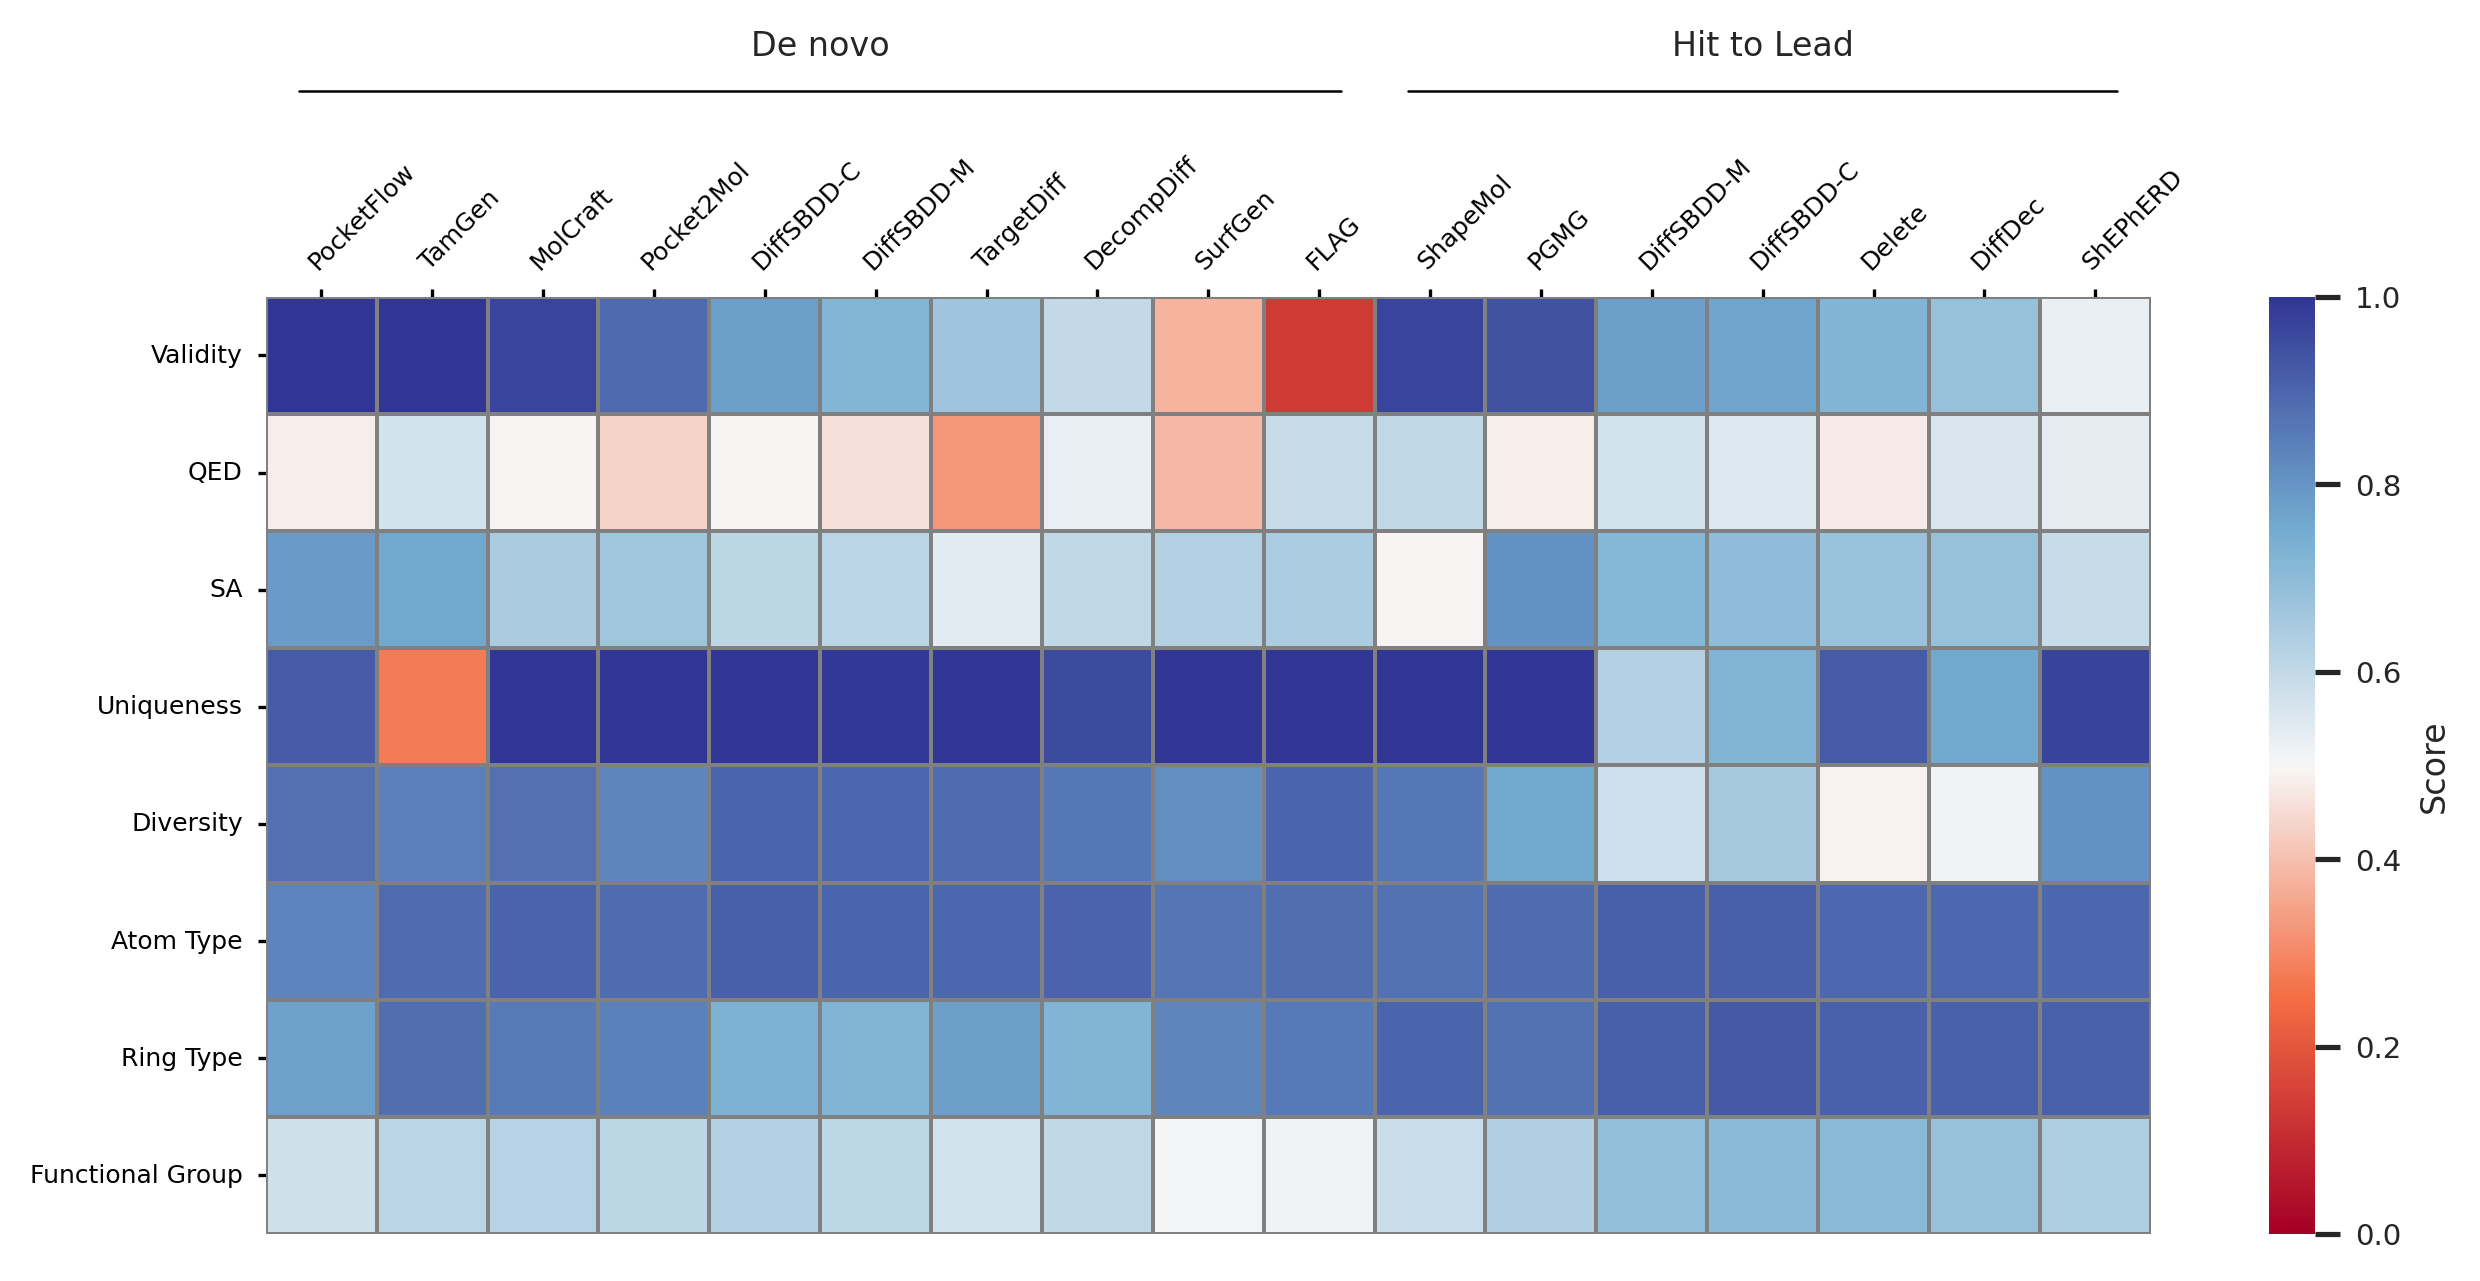

In [ ]:
data_seen = {
  "De novo": {'DecompDiff': {'Validity': 0.599,
  'QED': 0.53,
  'SA': 0.605,
  'logp': 2.002,
  'lipinski': 4.535,
  'Uniqueness': 0.955,
  'Diversity': 0.863,
  'Functional Group': 0.605,
  'Atom Type': 0.905,
  'Ring Type': 0.723},
 'FLAG': {'Validity': 0.135,
  'QED': 0.593,
  'SA': 0.642,
  'logp': 1.649,
  'lipinski': 4.977,
  'Uniqueness': 0.999,
  'Diversity': 0.9,
  'Functional Group': 0.515,
  'Atom Type': 0.879,
  'Ring Type': 0.858},
 'MolCraft': {'Validity': 0.968,
  'QED': 0.496,
  'SA': 0.647,
  'logp': 2.915,
  'lipinski': 4.349,
  'Uniqueness': 0.998,
  'Diversity': 0.877,
  'Functional Group': 0.623,
  'Atom Type': 0.903,
  'Ring Type': 0.855},
 'Pocket2Mol': {'Validity': 0.889,
  'QED': 0.436,
  'SA': 0.666,
  'logp': 4.053,
  'lipinski': 4.124,
  'Uniqueness': 1.0,
  'Diversity': 0.831,
  'Functional Group': 0.612,
  'Atom Type': 0.885,
  'Ring Type': 0.84},
 'PocketFlow': {'Validity': 1.0,
  'QED': 0.481,
  'SA': 0.787,
  'logp': 4.555,
  'lipinski': 4.44,
  'Uniqueness': 0.918,
  'Diversity': 0.876,
  'Functional Group': 0.575,
  'Atom Type': 0.833,
  'Ring Type': 0.771},
 'SurfGen': {'Validity': 0.375,
  'QED': 0.384,
  'SA': 0.625,
  'logp': 3.464,
  'lipinski': 4.093,
  'Uniqueness': 1.0,
  'Diversity': 0.814,
  'Functional Group': 0.507,
  'Atom Type': 0.867,
  'Ring Type': 0.829},
 'TamGen': {'Validity': 0.997,
  'QED': 0.569,
  'SA': 0.76,
  'logp': 2.258,
  'lipinski': 4.845,
  'Uniqueness': 0.274,
  'Diversity': 0.847,
  'Functional Group': 0.617,
  'Atom Type': 0.885,
  'Ring Type': 0.879},
 'TargetDiff': {'Validity': 0.67,
  'QED': 0.325,
  'SA': 0.54,
  'logp': 3.573,
  'lipinski': 3.824,
  'Uniqueness': 1.0,
  'Diversity': 0.886,
  'Functional Group': 0.571,
  'Atom Type': 0.898,
  'Ring Type': 0.781},
 'DiffSBDD-C': {'Validity': 0.78,
  'QED': 0.495,
  'SA': 0.61,
  'logp': 2.173,
  'lipinski': 4.577,
  'Uniqueness': 0.999,
  'Diversity': 0.899,
  'Functional Group': 0.627,
  'Atom Type': 0.911,
  'Ring Type': 0.733},
 'DiffSBDD-M': {'Validity': 0.719,
  'QED': 0.46,
  'SA': 0.617,
  'logp': 2.106,
  'lipinski': 4.572,
  'Uniqueness': 0.996,
  'Diversity': 0.898,
  'Functional Group': 0.606,
  'Atom Type': 0.901,
  'Ring Type': 0.726}},
 
 "Hit to Lead": {'Delete': {'Validity': 0.723,
  'QED': 0.479,
  'SA': 0.677,
  'logp': 2.898,
  'lipinski': 4.129,
  'Uniqueness': 0.92,
  'Diversity': 0.489,
  'Functional Group': 0.708,
  'Atom Type': 0.893,
  'Ring Type': 0.91},
 'DiffDec': {'Validity': 0.681,
  'QED': 0.555,
  'SA': 0.681,
  'logp': 2.942,
  'lipinski': 4.342,
  'Uniqueness': 0.756,
  'Diversity': 0.512,
  'Functional Group': 0.681,
  'Atom Type': 0.894,
  'Ring Type': 0.909},
 'PGMG': {'Validity': 0.94,
  'QED': 0.483,
  'SA': 0.807,
  'logp': 4.293,
  'lipinski': 4.407,
  'Uniqueness': 1.0,
  'Diversity': 0.754,
  'Functional Group': 0.634,
  'Atom Type': 0.886,
  'Ring Type': 0.874},
 'ShapeMol': {'Validity': 0.967,
  'QED': 0.603,
  'SA': 0.493,
  'logp': 1.748,
  'lipinski': 4.532,
  'Uniqueness': 0.998,
  'Diversity': 0.861,
  'Functional Group': 0.5880000000000001,
  'Atom Type': 0.872,
  'Ring Type': 0.9},
 'DiffSBDD-C': {'Validity': 0.768,
  'QED': 0.55,
  'SA': 0.697,
  'logp': 2.363,
  'lipinski': 4.613,
  'Uniqueness': 0.726,
  'Diversity': 0.656,
  'Functional Group': 0.704,
  'Atom Type': 0.914,
  'Ring Type': 0.923},
 'DiffSBDD-M': {'Validity': 0.781,
  'QED': 0.568,
  'SA': 0.715,
  'logp': 2.39,
  'lipinski': 4.685,
  'Uniqueness': 0.627,
  'Diversity': 0.579,
  'Functional Group': 0.6950000000000001,
  'Atom Type': 0.911,
  'Ring Type': 0.912},
 'ShEPhERD': {'Validity': 0.526,
  'QED': 0.532,
  'SA': 0.592,
  'logp': 2.874,
  'lipinski': 4.603,
  'Uniqueness': 0.97,
  'Diversity': 0.806,
  'Functional Group': 0.64,
  'Atom Type': 0.895,
  'Ring Type': 0.91}}
 }



top_8_keys = [
    'Validity',
    'QED',
    'SA',
    
    'Uniqueness',
    'Diversity',
        
    'Atom Type',    
    'Ring Type',
    'Functional Group',

]


plot_heatmap(data_seen, top_8_keys, save_path="./final_plot/output/00-2D_General_Properties_heatmap_seen.svg")
plot_heatmap(data_seen, top_8_keys, use_annot=False, save_path="./final_plot/output/00-2D_General_Properties_heatmap_seen_NoNumber.svg")

## unseen

In [ ]:
import os
import pandas as pd

general_property_denovo_unseen_csv = "./final_plot/general_property/denovo_design/all_proteins_repeats_unseen.csv"
general_property_hit2lead_unseen_csv = "./final_plot/general_property/hit2lead/all_proteins_repeats_unseen.csv"

property_2d_denovo_unseen_csv = "./final_plot/2d_property/denovo_design/2d_properties_denovo_UnSeen_mean_std.csv"
property_2d_hit2lead_unseen_csv = "./final_plot/2d_property/hit2lead/repeats_unseen_proteins.csv"

df_general_property_denovo = pd.read_csv(general_property_denovo_unseen_csv)
df_general_property_hit2lead = pd.read_csv(general_property_hit2lead_unseen_csv)

df_property_2d_denovo = pd.read_csv(property_2d_denovo_unseen_csv).rename(columns={'Unnamed: 0': 'model_name'})
df_property_2d_hit2lead = pd.read_csv(property_2d_hit2lead_unseen_csv)

In [ ]:
property_keys = ["model_name","validity","qed","sa","logp","lipinski","uniqueness","diversity", ]

df_general_property_denovo = df_general_property_denovo[property_keys].drop(0, axis=0)
df_general_property_hit2lead = df_general_property_hit2lead[property_keys].drop(0, axis=0)

for col in df_general_property_denovo.columns:
    if col != 'model_name':
        df_general_property_denovo[col] = pd.to_numeric(df_general_property_denovo[col], errors='coerce')
        
for col in df_general_property_hit2lead.columns:
    if col != 'model_name':
        df_general_property_hit2lead[col] = pd.to_numeric(df_general_property_hit2lead[col], errors='coerce')        

df_general_property_denovo

,model_name,validity,qed,sa,logp,lipinski,uniqueness,diversity
1,DecompDiff,0.567,0.489,0.515,1.934,4.062,0.857,0.768
2,FLAG,0.139,0.594,0.643,1.660,4.975,0.999,0.901
3,MolCraft,0.955,0.505,0.641,2.993,4.349,0.999,0.884
4,Pocket2Mol,0.852,0.434,0.641,4.054,4.112,1.000,0.838
5,PocketFlow,1.000,0.480,0.777,4.409,4.453,0.921,0.879
6,SurfGen,0.358,0.369,0.585,2.906,4.015,1.000,0.810
7,TamGen,0.996,0.581,0.772,2.149,4.857,0.265,0.839
8,TargetDiff,0.697,0.323,0.529,3.791,3.727,1.000,0.888
9,diffSBDD_cond_crossdocked,0.783,0.503,0.590,2.312,4.587,1.000,0.899
10,diffSBDD_cond_moad,0.707,0.474,0.601,2.462,4.599,0.998,0.899


In [ ]:
property_keys_2d = ["model_name","Functional Group JS","Atom Type JS","Ring Type JS"]
df_property_2d_denovo = df_property_2d_denovo[property_keys_2d].drop([0,1], axis=0)
df_property_2d_hit2lead = df_property_2d_hit2lead[property_keys_2d].drop([0], axis=0)

for col in df_property_2d_denovo.columns:
    if col != 'model_name':
        df_property_2d_denovo[col] = pd.to_numeric(df_property_2d_denovo[col], errors='coerce')
        df_property_2d_denovo[col] = 1 - df_property_2d_denovo[col]

for col in df_property_2d_hit2lead.columns:
    if col != 'model_name':
        df_property_2d_hit2lead[col] = pd.to_numeric(df_property_2d_hit2lead[col], errors='coerce')
        df_property_2d_hit2lead[col] = 1 - df_property_2d_hit2lead[col]

df_property_2d_denovo

,model_name,Functional Group JS,Atom Type JS,Ring Type JS
2,DecompDiff,0.610,0.905,0.727
3,FLAG,0.547,0.877,0.870
4,MolCraft,0.629,0.904,0.866
5,Pocket2Mol,0.601,0.886,0.855
6,PocketFlow,0.576,0.843,0.781
7,SurfGen,0.518,0.876,0.824
8,TamGen,0.583,0.861,0.885
9,TargetDiff,0.557,0.886,0.782
10,diffSBDD_cond_crossdocked,0.622,0.898,0.741
11,diffSBDD_cond_moad,0.608,0.893,0.736


In [ ]:
filter_keys = {
    "model_name": "model_name",
    
    "validity": "Validity",
    "qed": "QED",
    "sa": "SA",
    "logp": "logp",
    "lipinski": "lipinski",
    "uniqueness": "Uniqueness",
    "diversity": "Diversity",
    
    "Functional Group JS": "Functional Group",
    "Atom Type JS": "Atom Type",
    "Ring Type JS": "Ring Type",
}
df_final_denovo = pd.merge(df_general_property_denovo, df_property_2d_denovo, on='model_name', how='inner').set_index('model_name').rename(columns=filter_keys)
df_final_hit2lead = pd.merge(df_general_property_hit2lead, df_property_2d_hit2lead, on='model_name', how='inner').set_index('model_name').rename(columns=filter_keys)


In [65]:
df_final_denovo.to_dict(orient='index')

{'DecompDiff': {'Validity': 0.567,
  'QED': 0.489,
  'SA': 0.515,
  'logp': 1.934,
  'lipinski': 4.062,
  'Uniqueness': 0.857,
  'Diversity': 0.768,
  'Functional Group': 0.61,
  'Atom Type': 0.905,
  'Ring Type': 0.727},
 'FLAG': {'Validity': 0.139,
  'QED': 0.594,
  'SA': 0.643,
  'logp': 1.66,
  'lipinski': 4.975,
  'Uniqueness': 0.999,
  'Diversity': 0.901,
  'Functional Group': 0.5469999999999999,
  'Atom Type': 0.877,
  'Ring Type': 0.87},
 'MolCraft': {'Validity': 0.955,
  'QED': 0.505,
  'SA': 0.641,
  'logp': 2.993,
  'lipinski': 4.349,
  'Uniqueness': 0.999,
  'Diversity': 0.884,
  'Functional Group': 0.629,
  'Atom Type': 0.904,
  'Ring Type': 0.866},
 'Pocket2Mol': {'Validity': 0.852,
  'QED': 0.434,
  'SA': 0.641,
  'logp': 4.054,
  'lipinski': 4.112,
  'Uniqueness': 1.0,
  'Diversity': 0.838,
  'Functional Group': 0.601,
  'Atom Type': 0.886,
  'Ring Type': 0.855},
 'PocketFlow': {'Validity': 1.0,
  'QED': 0.48,
  'SA': 0.777,
  'logp': 4.409,
  'lipinski': 4.453,
  'Uniq

In [66]:
df_final_hit2lead.to_dict(orient='index')

{'DeleteHit2Lead(CrossDock)': {'Validity': 0.739,
  'QED': 0.495,
  'SA': 0.686,
  'logp': 3.369,
  'lipinski': 4.217,
  'Uniqueness': 0.937,
  'Diversity': 0.521,
  'Functional Group': 0.718,
  'Atom Type': 0.895,
  'Ring Type': 0.902},
 'DiffDec': {'Validity': 0.669,
  'QED': 0.59,
  'SA': 0.694,
  'logp': 3.153,
  'lipinski': 4.434,
  'Uniqueness': 0.722,
  'Diversity': 0.516,
  'Functional Group': 0.6699999999999999,
  'Atom Type': 0.893,
  'Ring Type': 0.889},
 'PGMG': {'Validity': 0.938,
  'QED': 0.453,
  'SA': 0.81,
  'logp': 4.516,
  'lipinski': 4.362,
  'Uniqueness': 1.0,
  'Diversity': 0.749,
  'Functional Group': 0.637,
  'Atom Type': 0.896,
  'Ring Type': 0.87},
 'ShapeMol': {'Validity': 0.942,
  'QED': 0.613,
  'SA': 0.507,
  'logp': 1.815,
  'lipinski': 4.602,
  'Uniqueness': 1.0,
  'Diversity': 0.864,
  'Functional Group': 0.607,
  'Atom Type': 0.887,
  'Ring Type': 0.904},
 'diffSBDD_cond_crossdocked': {'Validity': 0.742,
  'QED': 0.564,
  'SA': 0.694,
  'logp': 2.621,


[7, 9, 2, 3, 0, 8, 1, 6, 4, 5]
[13, 15, 11, 10, 4, 5, 16]


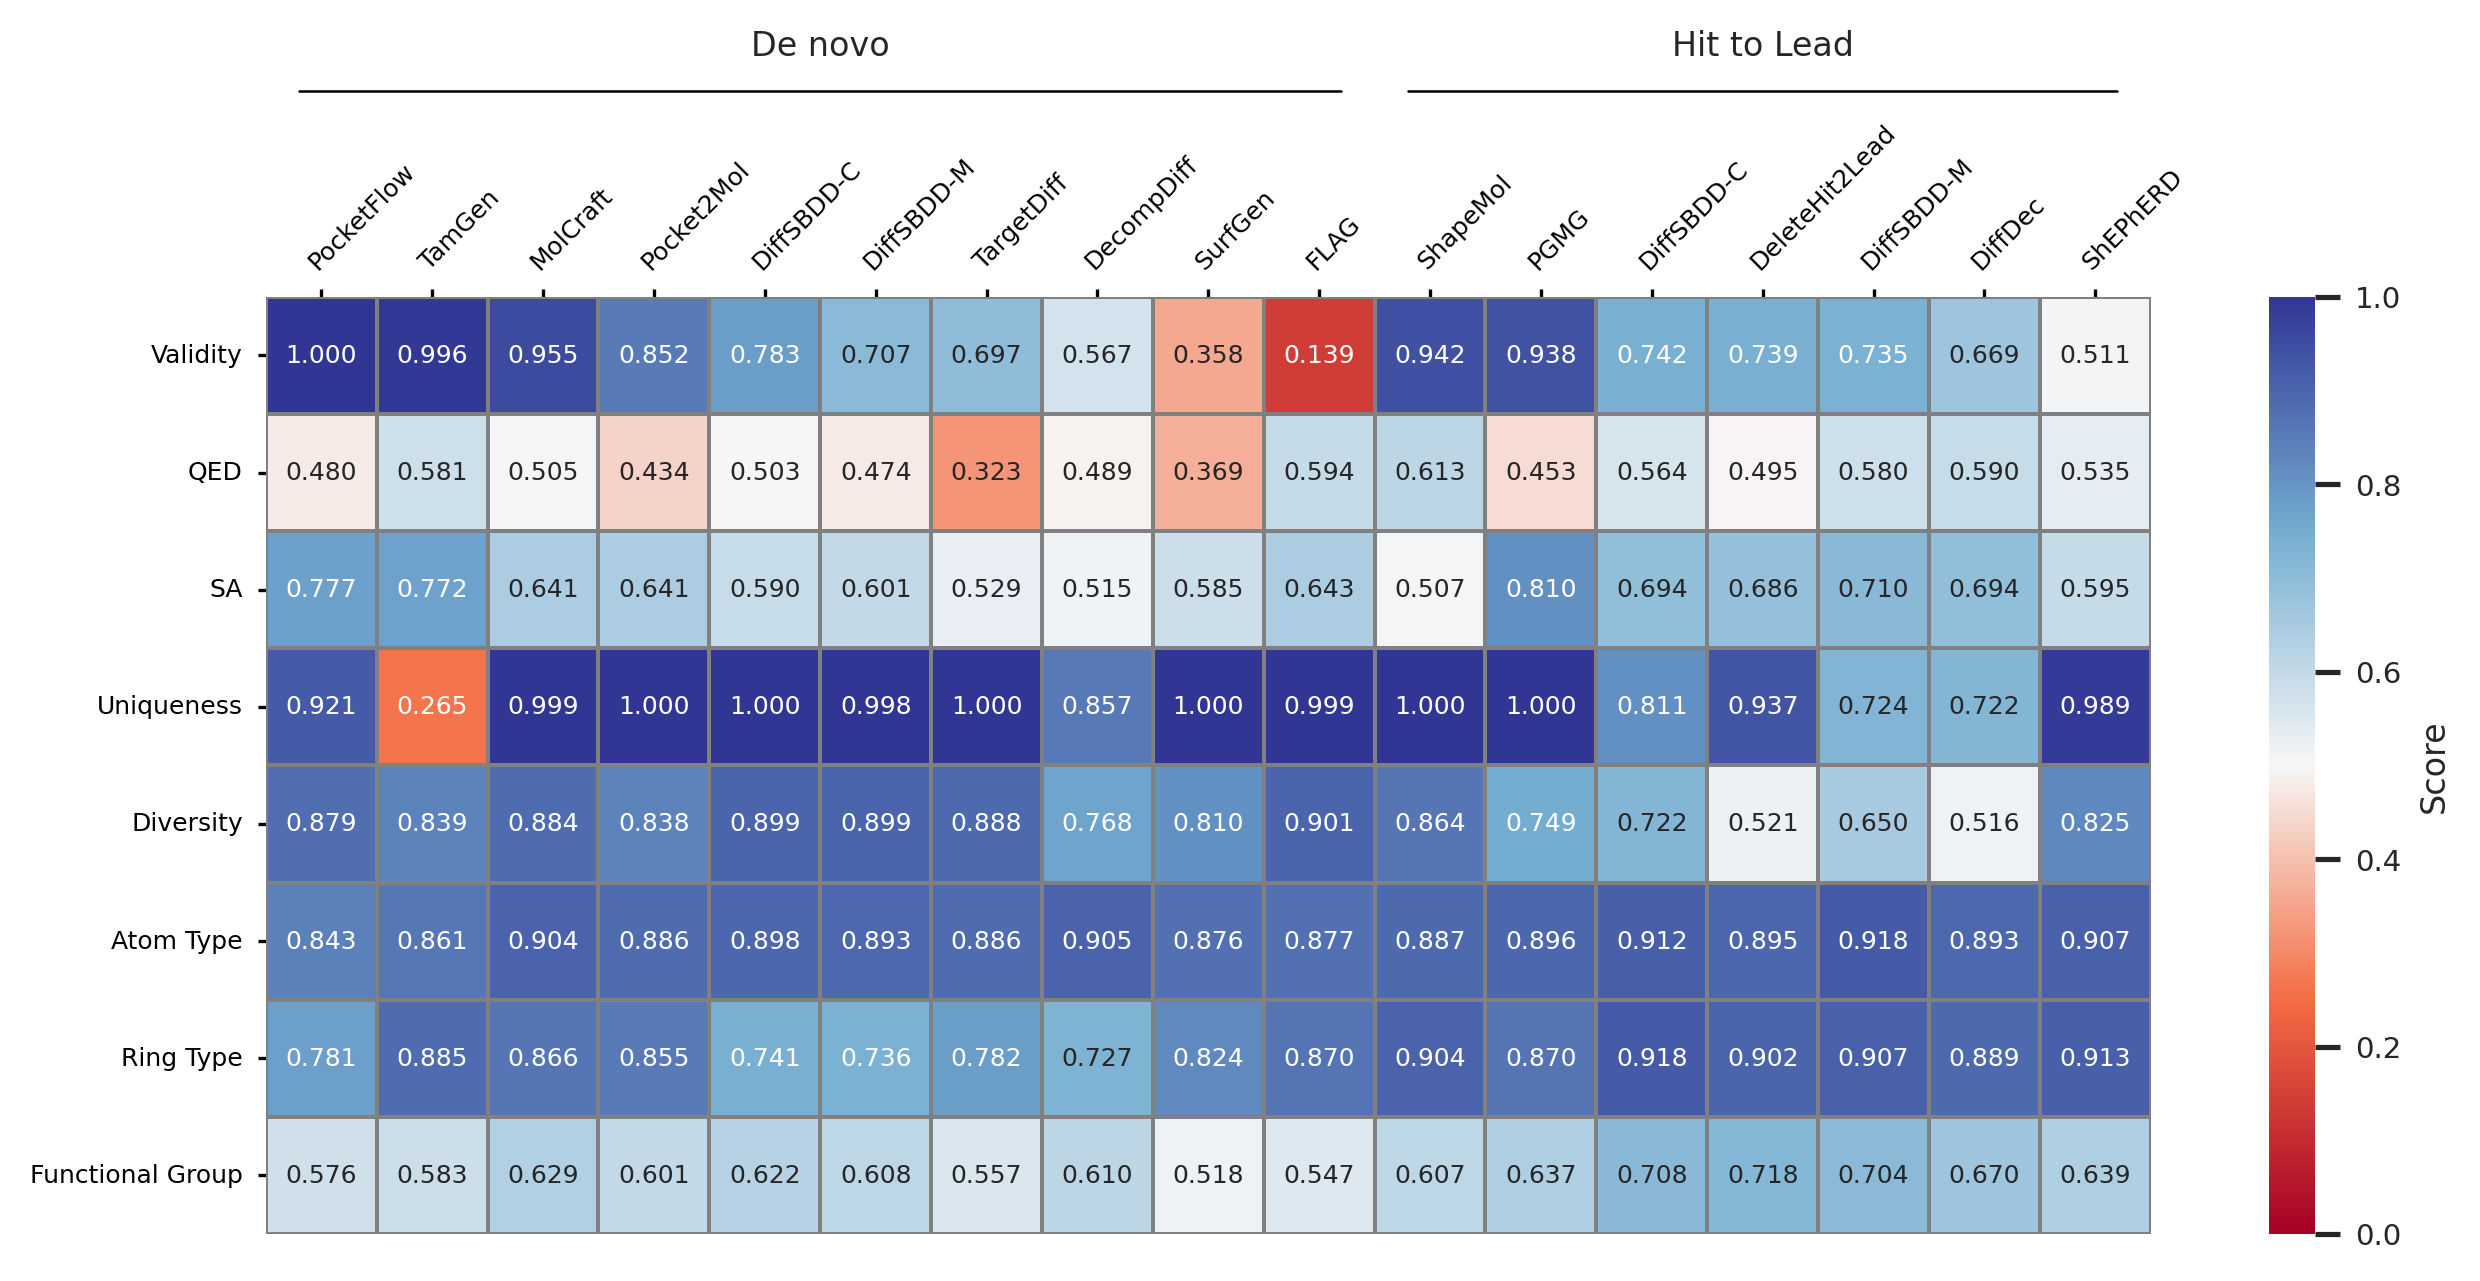

[7, 9, 2, 3, 0, 8, 1, 6, 4, 5]
[13, 15, 11, 10, 4, 5, 16]


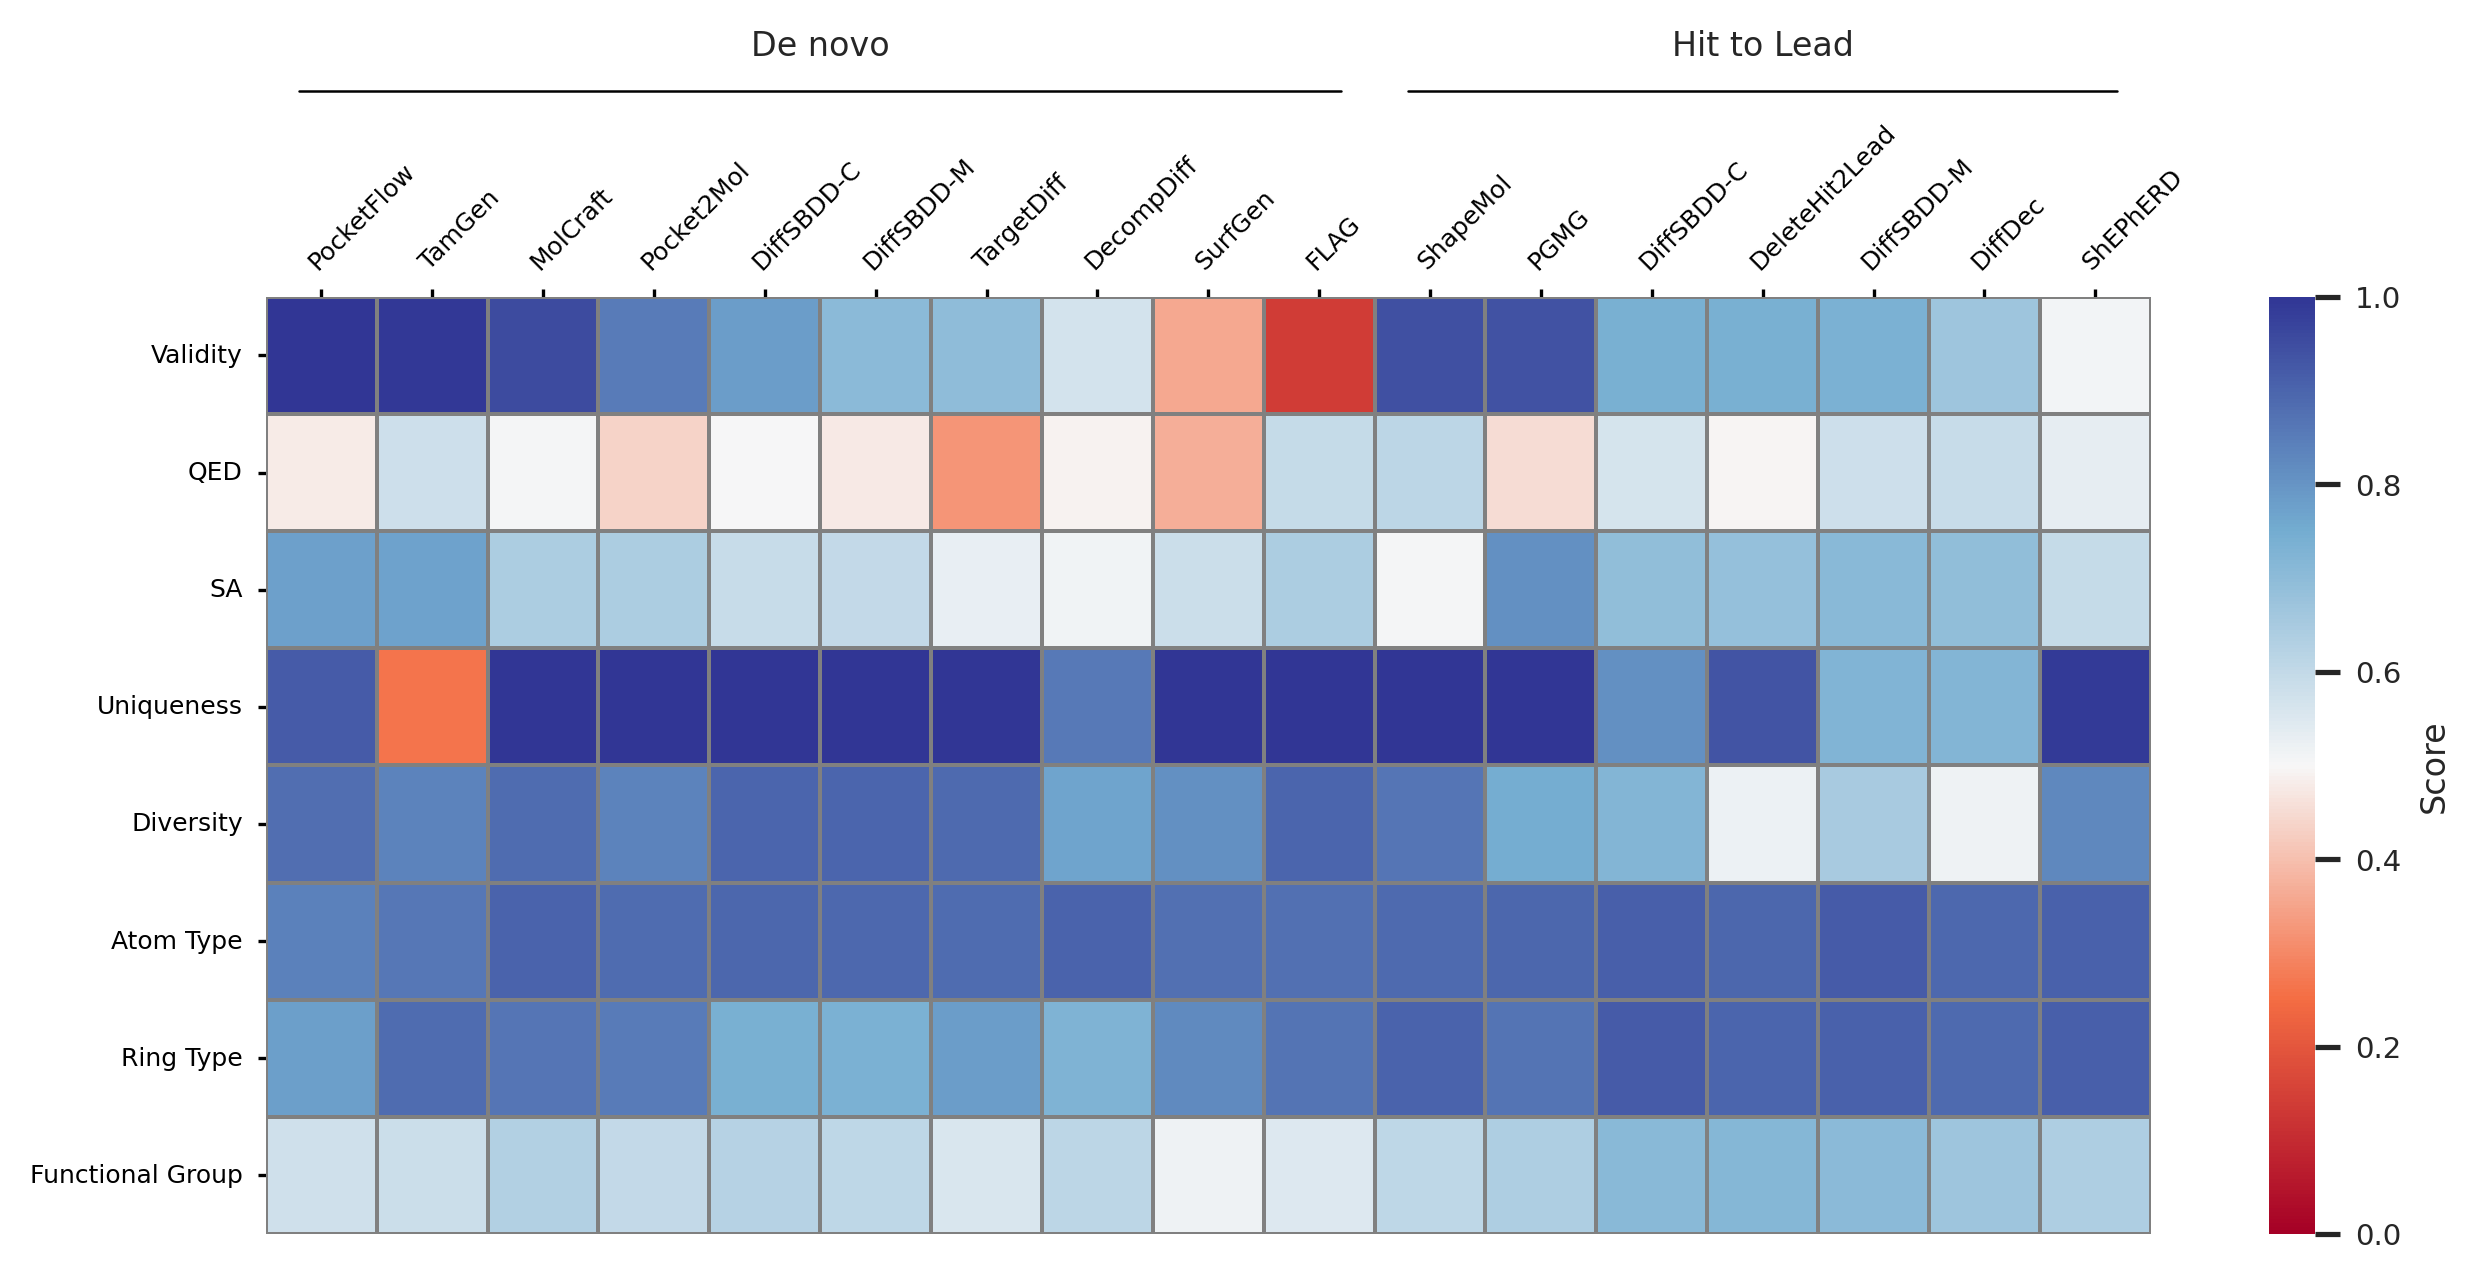

In [ ]:
data_unseen = {
  "De novo": {'DecompDiff': {'Validity': 0.567,
  'QED': 0.489,
  'SA': 0.515,
  'logp': 1.934,
  'lipinski': 4.062,
  'Uniqueness': 0.857,
  'Diversity': 0.768,
  'Functional Group': 0.61,
  'Atom Type': 0.905,
  'Ring Type': 0.727},
 'FLAG': {'Validity': 0.139,
  'QED': 0.594,
  'SA': 0.643,
  'logp': 1.66,
  'lipinski': 4.975,
  'Uniqueness': 0.999,
  'Diversity': 0.901,
  'Functional Group': 0.5469999999999999,
  'Atom Type': 0.877,
  'Ring Type': 0.87},
 'MolCraft': {'Validity': 0.955,
  'QED': 0.505,
  'SA': 0.641,
  'logp': 2.993,
  'lipinski': 4.349,
  'Uniqueness': 0.999,
  'Diversity': 0.884,
  'Functional Group': 0.629,
  'Atom Type': 0.904,
  'Ring Type': 0.866},
 'Pocket2Mol': {'Validity': 0.852,
  'QED': 0.434,
  'SA': 0.641,
  'logp': 4.054,
  'lipinski': 4.112,
  'Uniqueness': 1.0,
  'Diversity': 0.838,
  'Functional Group': 0.601,
  'Atom Type': 0.886,
  'Ring Type': 0.855},
 'PocketFlow': {'Validity': 1.0,
  'QED': 0.48,
  'SA': 0.777,
  'logp': 4.409,
  'lipinski': 4.453,
  'Uniqueness': 0.921,
  'Diversity': 0.879,
  'Functional Group': 0.5760000000000001,
  'Atom Type': 0.843,
  'Ring Type': 0.781},
 'SurfGen': {'Validity': 0.358,
  'QED': 0.369,
  'SA': 0.585,
  'logp': 2.906,
  'lipinski': 4.015,
  'Uniqueness': 1.0,
  'Diversity': 0.81,
  'Functional Group': 0.518,
  'Atom Type': 0.876,
  'Ring Type': 0.8240000000000001},
 'TamGen': {'Validity': 0.996,
  'QED': 0.581,
  'SA': 0.772,
  'logp': 2.149,
  'lipinski': 4.857,
  'Uniqueness': 0.265,
  'Diversity': 0.839,
  'Functional Group': 0.583,
  'Atom Type': 0.861,
  'Ring Type': 0.885},
 'TargetDiff': {'Validity': 0.697,
  'QED': 0.323,
  'SA': 0.529,
  'logp': 3.791,
  'lipinski': 3.727,
  'Uniqueness': 1.0,
  'Diversity': 0.888,
  'Functional Group': 0.5569999999999999,
  'Atom Type': 0.886,
  'Ring Type': 0.782},
 'DiffSBDD-C': {'Validity': 0.783,
  'QED': 0.503,
  'SA': 0.59,
  'logp': 2.312,
  'lipinski': 4.587,
  'Uniqueness': 1.0,
  'Diversity': 0.899,
  'Functional Group': 0.622,
  'Atom Type': 0.898,
  'Ring Type': 0.741},
 'DiffSBDD-M': {'Validity': 0.707,
  'QED': 0.474,
  'SA': 0.601,
  'logp': 2.462,
  'lipinski': 4.599,
  'Uniqueness': 0.998,
  'Diversity': 0.899,
  'Functional Group': 0.608,
  'Atom Type': 0.893,
  'Ring Type': 0.736}},
 
 "Hit to Lead": {'DeleteHit2Lead': {'Validity': 0.739,
  'QED': 0.495,
  'SA': 0.686,
  'logp': 3.369,
  'lipinski': 4.217,
  'Uniqueness': 0.937,
  'Diversity': 0.521,
  'Functional Group': 0.718,
  'Atom Type': 0.895,
  'Ring Type': 0.902},
 'DiffDec': {'Validity': 0.669,
  'QED': 0.59,
  'SA': 0.694,
  'logp': 3.153,
  'lipinski': 4.434,
  'Uniqueness': 0.722,
  'Diversity': 0.516,
  'Functional Group': 0.6699999999999999,
  'Atom Type': 0.893,
  'Ring Type': 0.889},
 'PGMG': {'Validity': 0.938,
  'QED': 0.453,
  'SA': 0.81,
  'logp': 4.516,
  'lipinski': 4.362,
  'Uniqueness': 1.0,
  'Diversity': 0.749,
  'Functional Group': 0.637,
  'Atom Type': 0.896,
  'Ring Type': 0.87},
 'ShapeMol': {'Validity': 0.942,
  'QED': 0.613,
  'SA': 0.507,
  'logp': 1.815,
  'lipinski': 4.602,
  'Uniqueness': 1.0,
  'Diversity': 0.864,
  'Functional Group': 0.607,
  'Atom Type': 0.887,
  'Ring Type': 0.904},
 'DiffSBDD-C': {'Validity': 0.742,
  'QED': 0.564,
  'SA': 0.694,
  'logp': 2.621,
  'lipinski': 4.682,
  'Uniqueness': 0.811,
  'Diversity': 0.722,
  'Functional Group': 0.708,
  'Atom Type': 0.912,
  'Ring Type': 0.918},
 'DiffSBDD-M': {'Validity': 0.735,
  'QED': 0.58,
  'SA': 0.71,
  'logp': 2.754,
  'lipinski': 4.75,
  'Uniqueness': 0.724,
  'Diversity': 0.65,
  'Functional Group': 0.704,
  'Atom Type': 0.918,
  'Ring Type': 0.907},
 'ShEPhERD': {'Validity': 0.511,
  'QED': 0.535,
  'SA': 0.595,
  'logp': 3.32,
  'lipinski': 4.648,
  'Uniqueness': 0.989,
  'Diversity': 0.825,
  'Functional Group': 0.639,
  'Atom Type': 0.907,
  'Ring Type': 0.913}}
 }


top_8_keys = [
    'Validity',
    'QED',
    'SA',

    'Uniqueness',
    'Diversity',
        
    'Atom Type',    
    'Ring Type',
    'Functional Group',
    

]


plot_heatmap(data_unseen, top_8_keys, save_path="./final_plot/output/00-2D_General_Properties_heatmap_unseen.svg")
plot_heatmap(data_unseen, top_8_keys, use_annot=False, save_path="./final_plot/output/00-2D_General_Properties_heatmap_unseen_NoNumber.svg")